In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


In [95]:
X_features = pd.read_csv(r'C:\Users\Avishkar\OneDrive\Documents\hw dataset\x_train_all.csv')

In [96]:
Y_labels = pd.read_csv(r'C:\Users\Avishkar\OneDrive\Documents\hw dataset\y_train_all.csv')

In [99]:
## EXTARCT THE FEATURES AND LABELS

In [100]:
extract_features = X_features.iloc[:, :-1].values
extract_labels = Y_labels.iloc[:, -1].values 

In [101]:
extract_features,extract_labels

(array([[ 78.,  77.,  76., ...,  99.,  98.,  95.],
        [ 73.,  75.,  79., ...,  83., 100., 101.],
        [ 72.,  75.,  79., ...,  74.,  80.,  89.],
        ...,
        [255., 255., 255., ...,  39.,  31.,  39.],
        [255., 253., 255., ...,  27.,  26.,  26.],
        [252., 189., 238., ...,  23.,  26.,  20.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int64))

In [102]:
## FEATURE SCALING

In [103]:
xfeatures_scaled = StandardScaler()
features_scaled = xfeatures_scaled.fit_transform(extract_features)

pipeline = make_pipeline(xfeatures_scaled, pca)
pipeline.fit(extract_features)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [105]:
features_scaled

array([[-0.15039878, -0.16202714, -0.17251929, ...,  0.47774825,
         0.47288363,  0.43276125],
       [-0.21490048, -0.18785807, -0.13373277, ...,  0.22880329,
         0.50423353,  0.52734801],
       [-0.22780082, -0.18785807, -0.13373277, ...,  0.08877174,
         0.19073454,  0.33817449],
       ...,
       [ 2.13296126,  2.13692606,  2.14174305, ..., -0.45579537,
        -0.577338  , -0.45004847],
       [ 2.13296126,  2.11109513,  2.14174305, ..., -0.64250409,
        -0.65571275, -0.65498644],
       [ 2.09426025,  1.28450521,  1.92195277, ..., -0.70474033,
        -0.65571275, -0.74957319]])

In [ ]:
## pipeline meathod

In [153]:
pipeline = make_pipeline(StandardScaler(), PCA(n_components=2))

In [152]:
features_pca = pipeline.fit_transform(extract_features)

In [ ]:
##KMEANS CLUSTERING

In [154]:
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_pca)

#### VISUALIZATION OF CLUSTERING

In [156]:
import seaborn as sns

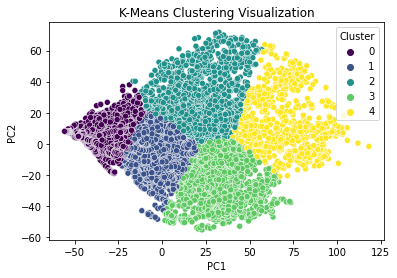

In [157]:
df = pd.DataFrame({'PC1': features_pca[:, 0], 'PC2': features_pca[:, 1], 'Cluster': clusters})
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering Visualization')
plt.show()

##### deciding the number of clusters

In [107]:
from sklearn.metrics import silhouette_score

In [174]:
silhouette_scores = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clus_labels=kmeans.fit_predict(extract_features)
    silhouette_avg=silhouette_score(extract_features, clus_labels)
    silhouette_scores.append(silhouette_avg)

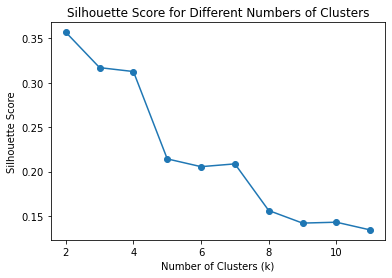

In [175]:
plt.plot(range(2, 12), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [110]:
inertias = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(extract_features)
    inertias.append(kmeans.inertia_)

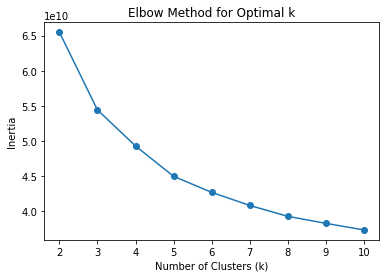

In [111]:
plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow MEATHOD k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [112]:
from sklearn.cluster import KMeans

In [144]:
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

In [145]:
##how well the clusters align with the original labels

clusters_result = pd.DataFrame({'Class': extract_labels, 'Cluster': k_clusters})
print(clusters_result.head())

   Class  Cluster
0      0        2
1      0        2
2      0        2
3      0        2
4      0        2


In [146]:
silhouette_avg = silhouette_score(features_scaled, clusters)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.21467907445159523


In [123]:
from sklearn.mixture import GaussianMixture

In [ ]:
##GaussianMixture

In [164]:
k=5
GMM = GaussianMixture(n_components=k, random_state=42)
GMM.fit(features_scaled)
GMM_PROB = GMM.predict_proba(features_scaled)
GMM_CLUSTER = np.argmax(GMM_PROB, axis=1)
GMM_silhouette = silhouette_score(features_scaled, GMM_CLUSTER)

print(f"GMM Silhouette Score: {GMM_silhouette}")

GMM Silhouette Score: 0.21423844097990355


In [160]:
k =10 
kmeans = KMeans(n_clusters=k, random_state=42)
clus_labels=kmeans.fit_predict(extract_features)
silhouette_avg=silhouette_score(extract_features, clus_labels)
silhouette_scores.append(silhouette_avg)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.14310085176172915


In [162]:
k =4
kmeans = KMeans(n_clusters=k, random_state=42)
clus_labels=kmeans.fit_predict(extract_features)
silhouette_avg=silhouette_score(extract_features, clus_labels)
silhouette_scores.append(silhouette_avg)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3126217307204029
